# Data mining midterm
# Xi Yan

In [558]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import r2_score
import time

%matplotlib inline
plt.style.use('seaborn-white')

### Data cleaning

In [559]:
# Load csv file, display top 5 rows
df = pd.read_csv('worldHapinness_2015_2020.csv')
df.head(5)

,country,Regional indicator,happinessScore,GDPperCap,socialSupport,healthLE,freedom,generosity,trustGovernment,year
0,Finland,Western Europe,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
1,Denmark,Western Europe,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
2,Norway,Western Europe,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
3,Iceland,Western Europe,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
4,Netherlands,Western Europe,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [560]:
# Verify if there are any missing values, if yes, then drop the NaN value rows
df.info()
df.isnull().sum(axis=0)
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             935 non-null    object 
 1   Regional indicator  933 non-null    object 
 2   happinessScore      935 non-null    float64
 3   GDPperCap           935 non-null    float64
 4   socialSupport       935 non-null    float64
 5   healthLE            935 non-null    float64
 6   freedom             935 non-null    float64
 7   generosity          935 non-null    float64
 8   trustGovernment     934 non-null    float64
 9   year                935 non-null    int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 73.2+ KB


In [561]:
# Turn regional indicator into numerical categories
df['Regional indicator'] = df['Regional indicator'].astype('category')
df['Regional indicator'] = df['Regional indicator'].cat.codes

"""
0- Central and Eastern Europe
1- Commonwealth of Independent States
2- East Asia
3- Latin America and Caribbean
4- Middle East and North Africa
5- North America and ANZ
6- Southern Asia
7- Southeastern Asia
8- Sub-Saharan Africa
9- Western Europe
"""

'\n0- Central and Eastern Europe\n1- Commonwealth of Independent States\n2- East Asia\n3- Latin America and Caribbean\n4- Middle East and North Africa\n5- North America and ANZ\n6- Southern Asia\n7- Southeastern Asia\n8- Sub-Saharan Africa\n9- Western Europe\n'

In [562]:
# Split data into 2015-2019 and 2020, drop country name since it should not be included in the training model set
df_1519 = df.loc[df['year'].isin([2015, 2016, 2017, 2018, 2019])]
df_20 = df.loc[df['year'] == 2020]


In [563]:
# Set up X, y, drop country names
X = df_1519.drop(['happinessScore', 'country'], axis=1)
y = df_1519['happinessScore']

### 2 Visualization plots

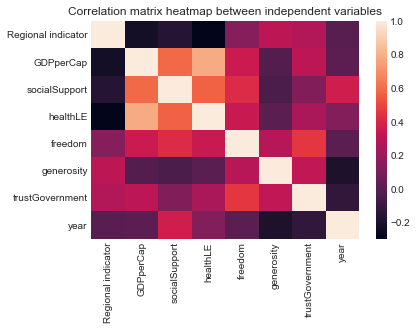

In [564]:
# Data visualization plots (first)
corr = X.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,).set_title('Correlation matrix heatmap between independent variables')
plt.show()

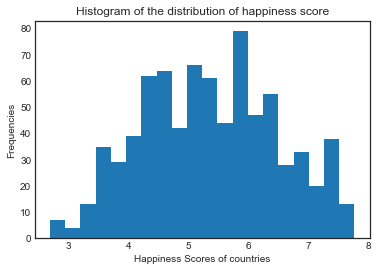

In [565]:
# Data visualization plots (second)
plt.hist(y, bins=20)
plt.xlabel('Happiness Scores of countries')
plt.ylabel('Frequencies')
plt.title('Histogram of the distribution of happiness score')
plt.show()

In [566]:
# Set up train and test sets of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

### Prediction: Step 1 Fit a model, First model - Linear regression

In [567]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print('Train MSE is', mean_squared_error(y_train, y_train_pred))
print('Test MSE is', mean_squared_error(y_test, y_test_pred))
print('Train R^2 is', lm.score(X_train, y_train))
print('Test R^2 is', lm.score(X_test, y_test))

Train MSE is 0.27818234246035545
Test MSE is 0.32059351594341645
Train R^2 is 0.7888747512447358
Test R^2 is 0.7144171756012081


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


### Prediction: Step 1 Fit a model, Second model - Polynomial regression degree 1-6

In [568]:
for i in [1, 2, 3, 4, 5, 6]:
    poly_model = PolynomialFeatures(degree=i)

    X_poly_train = poly_model.fit_transform(X_train)
    X_poly_test = poly_model.fit_transform(X_test)

    lm_poly = LinearRegression(normalize=True)
    lm_poly.fit(X_poly_train, y_train)
    y_train_pred_poly = lm_poly.predict(X_poly_train)
    y_test_pred_poly = lm_poly.predict(X_poly_test)

    print('MSE for polynomial model degree', i, "train is", mean_squared_error(y_train, y_train_pred_poly))
    print('MSE for polynomial model degree', i, "test is", mean_squared_error(y_test, y_test_pred_poly))
    print('R^2 for polynomial model degree', i, "train is", lm_poly.score(X_poly_train, y_train))
    print('R^2 for polynomial model degree', i, "test is", lm_poly.score(X_poly_test, y_test))
    print('\n')

/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

MSE for polynomial model degree 1 train is 0.27818234246035584
MSE for polynomial model degree 1 test is 0.32059351594341556
R^2 for polynomial model degree 1 train is 0.7888747512447355
R^2 for polynomial model degree 1 test is 0.7144171756012089


MSE for polynomial model degree 2 train is 0.21700503794827147
MSE for polynomial model degree 2 test is 0.2528401132321522
R^2 for polynomial model degree 2 train is 0.8353049937937609
R^2 for polynomial model degree 2 test is 0.7747715095058485


MSE for polynomial model degree 3 train is 0.11418765833744243
MSE for polynomial model degree 3 test is 0.278382140519873
R^2 for polynomial model degree 3 train is 0.9133377857197772
R^2 for polynomial model degree 3 test is 0.7520188213479703


MSE for polynomial model degree 4 train is 0.02050986728278804
MSE for polynomial model degree 4 test is 11.350211206843463
R^2 for polynomial model degree 4 train is 0.984434127652681
R^2 for polynomial model degree 4 test is -9.110701598048777


MSE f

From the MSE and R^2 above, we are able to see that degree 2 is the best model due to bias-variance trade-off. The MSE for both test and train data is one of the smallest, and the R^2 of test and train data is one of the highest among other degrees.

### Prediction: Step 1 Fit a model, Third model - LASSO regression

In [569]:
alphas = np.logspace(-5, 5, 200)
model_lassoCV = LassoCV(normalize=True, alphas=alphas, cv=10).fit(X_train, y_train)
y_train_pred_lasso = model_lassoCV.predict(X_train)
y_test_pred_lasso = model_lassoCV.predict(X_test)
print("LassoCV - best alpha: "+str(model_lassoCV.alpha_))
print("LassoCV train - R-squared: "+str(model_lassoCV.score(X_train, y_train)))
print("LassoCV test - R-squared: "+str(model_lassoCV.score(X_test, y_test)))
print('MSE for Lasso train is:', mean_squared_error(y_train, y_train_pred_lasso))
print('MSE for Lasso test is:', mean_squared_error(y_test, y_test_pred_lasso))


LassoCV - best alpha: 0.0004055460735840828
LassoCV train - R-squared: 0.788534826225302
LassoCV test - R-squared: 0.7163818581778771
MSE for Lasso train is: 0.2786302336468643
MSE for Lasso test is: 0.3183879754096218


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Based on these three models, I would conclude that Polynomial degree 2 regression is the best model out of the three models. Since it has the higher R-squared (0.84, 0.77) for both test and train data, while maintaining the lowest MSE (0.21, 0.25) for test and train data among them all.

### Prediction: Step 2 Feature selection - Forward stepwise selection

In [570]:
for i in range(1,len(X.columns)):
    model= LinearRegression()
    sfs = SequentialFeatureSelector(model,
                                n_features_to_select = i,
                                direction="forward",
                                scoring='neg_mean_squared_error',
                                cv= 10)
    sfs = sfs.fit(X,y)
    feature_names= X_train.columns.values#column names for X
    print(i, "features selected by forward sequential selection: "+str(feature_names[sfs.get_support()]))
    print('\n')

1 features selected by forward sequential selection: ['GDPperCap']


2 features selected by forward sequential selection: ['GDPperCap' 'freedom']


3 features selected by forward sequential selection: ['GDPperCap' 'healthLE' 'freedom']


4 features selected by forward sequential selection: ['GDPperCap' 'healthLE' 'freedom' 'generosity']


5 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom' 'generosity']


6 features selected by forward sequential selection: ['GDPperCap' 'socialSupport' 'healthLE' 'freedom' 'generosity'
 'trustGovernment']


7 features selected by forward sequential selection: ['Regional indicator' 'GDPperCap' 'socialSupport' 'healthLE' 'freedom'
 'generosity' 'trustGovernment']




Based on the forward stepwise selection, it shows that the top 3 most significant feature is GDPperCAP, freedom, and healthLE and the least 3 significant feature is regional indicator, trust government, social support.

Let's see if dropping the regional indicator and trust government is going to increase R^2 and decrease MSE for Polynomial degree 2 model or not.

### Prediction: Step 2 Feature selection - eliminate 'Regional indicator' and 'trustGovernment' features

In [571]:
# eliminate 'Regional indicator' and 'trustGovernment' features
X_train_selected = X_train[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity']]
X_test_selected = X_test[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity']]

poly_model = PolynomialFeatures(degree=2)

X_poly_train_selected = poly_model.fit_transform(X_train_selected)
X_poly_test_selected = poly_model.fit_transform(X_test_selected)

lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train_selected, y_train)
y_train_pred_poly_selected = lm_poly.predict(X_poly_train_selected)
y_test_pred_poly_selected = lm_poly.predict(X_poly_test_selected)

print('Eliminated Regional indicator and trustGovernment features')
print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly_selected))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly_selected))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train_selected, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test_selected, y_test))
print('\n')

# eliminate 'Regional indicator' features
print('Eliminated Regional indicator features')
X_train_selected = X_train[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment']]
X_test_selected = X_test[['GDPperCap', 'socialSupport', 'healthLE', 'freedom', 'generosity', 'trustGovernment']]

poly_model = PolynomialFeatures(degree=2)

X_poly_train_selected = poly_model.fit_transform(X_train_selected)
X_poly_test_selected = poly_model.fit_transform(X_test_selected)

lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train_selected, y_train)
y_train_pred_poly_selected = lm_poly.predict(X_poly_train_selected)
y_test_pred_poly_selected = lm_poly.predict(X_poly_test_selected)

print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly_selected))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly_selected))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train_selected, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test_selected, y_test))

Eliminated Regional indicator and trustGovernment features
MSE for polynomial model degree 2 train is 0.2802714460473792
MSE for polynomial model degree 2 test is 0.28375499722876985
R^2 for polynomial model degree 2 train is 0.7872892353899732
R^2 for polynomial model degree 2 test is 0.7472327120921375


Eliminated Regional indicator features
MSE for polynomial model degree 2 train is 0.27011574966465157
MSE for polynomial model degree 2 test is 0.2768391783693554
R^2 for polynomial model degree 2 train is 0.7949968558885383
R^2 for polynomial model degree 2 test is 0.7533932829854384


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from 

The above code show that dropping any of the feature will increase MSE and reduce R^2 for both of train and test of the Polynomial degree 2 model, therefore, it shows that all features are significant to the model, therefore we should not eliminate any of the features.


### Prediction: Step 3 Predict 2020

In [572]:
# Rerun the polynomial degree 2 model
poly_model = PolynomialFeatures(degree=2)

X_poly_train = poly_model.fit_transform(X_train)
X_poly_test = poly_model.fit_transform(X_test)

lm_poly = LinearRegression(normalize=True)
lm_poly.fit(X_poly_train, y_train)
y_train_pred_poly = lm_poly.predict(X_poly_train)
y_test_pred_poly = lm_poly.predict(X_poly_test)

print('MSE for polynomial model degree 2 train is', mean_squared_error(y_train, y_train_pred_poly))
print('MSE for polynomial model degree 2 test is', mean_squared_error(y_test, y_test_pred_poly))
print('R^2 for polynomial model degree 2 train is', lm_poly.score(X_poly_train, y_train))
print('R^2 for polynomial model degree 2 test is', lm_poly.score(X_poly_test, y_test))

MSE for polynomial model degree 2 train is 0.21700503794827147
MSE for polynomial model degree 2 test is 0.2528401132321522
R^2 for polynomial model degree 2 train is 0.8353049937937609
R^2 for polynomial model degree 2 test is 0.7747715095058485


/Users/nellyan45/.conda/envs/untitled/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [573]:
# Predict 2020
X_2020 = df_20.drop(['happinessScore', 'country'], axis=1)
y_2020 = df_20['happinessScore']
X_poly_2020 = poly_model.fit_transform(X_2020)
y_pred_poly_2020 = lm_poly.predict(X_poly_2020)

### Prediction: Step 3 Predict 2020 - Top 10 and bottom 10 countries

In [574]:
y_2020_pred_list = list(y_pred_poly_2020)
df_20_list = list(df_20['country'])
pred_2020_result = pd.DataFrame({'country':df_20_list, 'prediction result':y_2020_pred_list})
print('The top 10 highest happiness score country is', pred_2020_result.nlargest(10, 'prediction result'))
print('The bottom 10 highest happiness score country is', pred_2020_result.nsmallest(10, 'prediction result'))

The top 10 highest happiness score country is            country  prediction result
3          Iceland           6.764555
22          France           6.681299
2      Switzerland           6.674264
8          Austria           6.614838
4           Norway           6.597297
15         Ireland           6.590107
5      Netherlands           6.486921
27           Spain           6.485599
9       Luxembourg           6.466128
12  United Kingdom           6.457056
The bottom 10 highest happiness score country is                       country  prediction result
149                    Rwanda           2.621388
152               Afghanistan           3.024488
151               South Sudan           3.032646
139                   Burundi           3.099356
148  Central African Republic           3.168476
141                     Haiti           3.206162
85                      Benin           3.310746
134                      Togo           3.504465
133                   Comoros           3.6040

### Prediction: Step 3 Predict 2020 - Accuracy


In [575]:
print('MSE for polynomial model degree 2 in 2020 dataset is', mean_squared_error(y_2020, y_pred_poly_2020))
print('R^2 for polynomial model degree 2 in 2020 dataset is', lm_poly.score(X_poly_2020, y_2020))

MSE for polynomial model degree 2 in 2020 dataset is 0.363537424779952
R^2 for polynomial model degree 2 in 2020 dataset is 0.7042148363111569


From the above MSE and R^2, we are able to say that the model is pretty accurate of the dataset, with an MSE as small as 0.36 and R^2 to be 0.7, this is pretty good comparing to other models.

### Classification: change continuous target variables into dummies

In this case, I want to classify whether a country is happy or not, therefore, I will transform the country happiness score into happy(1) and not_happy(0), and predict the result using classification models.

To classify happy/not happy, I will split the score based on average score, for the happiness score below average will be classified as not happy, vice versa.

In [576]:
# Convert continuous to 0 and 1 base on average score
avg = y_train.sum() / len(y_train)
y_train.loc[y_train < avg] = 0
y_train.loc[y_train >= avg] = 1
y_test.loc[y_test < avg] = 0
y_test.loc[y_test >= avg] = 1

### Classification: Step 1 Fit a model, First model - KNN

Firstly, we need to know which number of K (number of neighbors) is the most accurate for our model

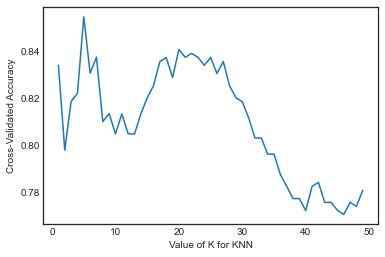

The optimal number of neighbors for my KNN model is: 4


In [577]:
accuracy = []
# range(1, 50) tests KNN neighbors from 1 to 50 to see which is the highest
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    # Cross Validation K = 10, scoring based on accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    accuracy.append(sum(scores)/len(scores))

plt.plot(range(1,50), accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print('The optimal number of neighbors for my KNN model is:', accuracy.index(max(accuracy)))

[[92 12]
 [22 69]]


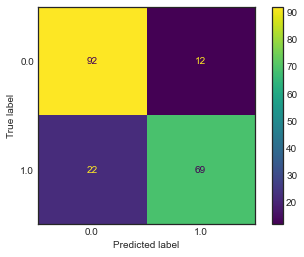

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       104
         1.0       0.85      0.76      0.80        91

    accuracy                           0.83       195
   macro avg       0.83      0.82      0.82       195
weighted avg       0.83      0.83      0.82       195



In [578]:
# Fit the model using number of nearest neighbor of 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
# predict y test using KNN model
y_KNN_pred = knn.predict(X_test)
# Generate confusion matrix
c_matrix = confusion_matrix(y_test, y_KNN_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()
print(classification_report(y_test, y_KNN_pred))

### Classification: Step 1 Fit a model, Second model - Naive Bayes

[[93 11]
 [15 76]]


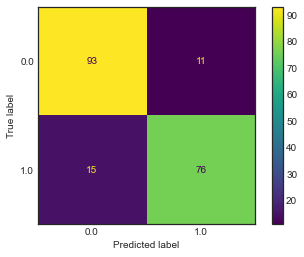

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       104
         1.0       0.87      0.84      0.85        91

    accuracy                           0.87       195
   macro avg       0.87      0.86      0.87       195
weighted avg       0.87      0.87      0.87       195



In [579]:
model = GaussianNB()
#your code here
model.fit(X_train, y_train)
y_NB_pred2 = model.predict(X_test)
c_matrix2 = confusion_matrix(y_test, y_NB_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=c_matrix2, display_labels=model.classes_)
disp2.plot()
plt.show()
print(classification_report(y_test, y_NB_pred2))

Both of these model show a pretty high accuracy score on classifying whether a country is happy or not. However, Naive Bayes have a slightly higher accuracy scores and higher precision of classification of happy or not happy. Therefore, I will choose Naive Bayes as the model that are more fitted as the final model.

The Naive Bayes model does not have a higher difficulty classifying a certain class, both of the classification are highly precise, this is due to the independence assumption of the Naive Bayes model.

In [582]:
# Calculated the accuracy score, (also shown in the classification report)
acc = metrics.accuracy_score(y_test, y_NB_pred2)
print(acc)

0.8666666666666667


Based on the classification report and the calculation of accuracy score, which is 87%, it shows that the model can classify whether a country is happy or not precisely with a pretty high accuracy score.

### Reference
1. Convert categorical data in pandas dataframe https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/46186626
2. How do I select rows from a DataFrame based on column values? https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
3. Correlation heatmap https://stackoverflow.com/questions/39409866/correlation-heatmap
4. Homework 2 and lab 2 of data mining
5. How to convert ndarray to series in python https://stackoverflow.com/questions/30564172/how-to-convert-ndarray-to-series-in-python
6. How to Select Top N Rows with the Largest Values in a Column(s) in Pandas? https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
7. sklearn.metrics.accuracy_score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
